In [1]:
from pymongo import MongoClient
client = MongoClient("mongodb://127.0.0.1:27017/?directConnection=true&serverSelectionTimeoutMS=2000&appName=mongosh+2.4.2")
db = client["aiml"]
collection = db["test"]

region = [
    {"$match": {"region": "east"}},  
    {"$group": {"_id": None, "total_qty": {"$sum": "$qty"}}}  
]
result = list(collection.aggregate(region))    
total_qty = result[0]["total_qty"] if result else 0
print("Total qty for East region:", total_qty)

region1 = [
    {"$match": {"region": "south"}},  
    {"$group": {"_id": None, "total_qty1": {"$sum": "$qty"}}}  
]
result1 = list(collection.aggregate(region1))
total_qty1 = result1[0]["total_qty1"] if result1 else 0
print("Total qty for south region:", total_qty1)    


region2 = [
    {"$match": {"region": "north"}},  
    {"$group": {"_id": None, "total_qty2": {"$sum": "$qty"}}}  
]
result2 = list(collection.aggregate(region2))
total_qty2 = result2[0]["total_qty2"] if result2 else 0
print("Total qty for north region:", total_qty2)   
client.close() 
    

Total qty for East region: 520
Total qty for south region: 180
Total qty for north region: 110


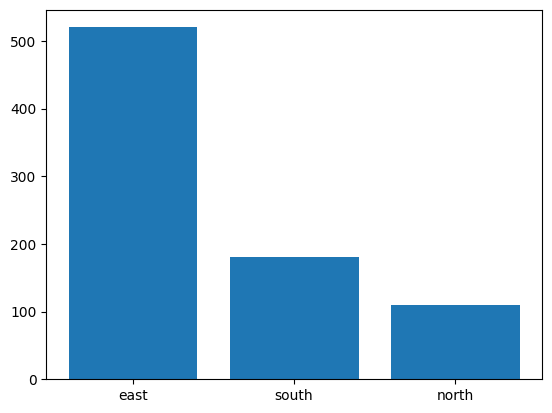

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array(['east','south','north'])
y=np.array([total_qty,total_qty1,total_qty2])
plt.bar(x,y)
plt.show()
    